In [2]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = str(Path.cwd().resolve().parents[0])
if project_root not in sys.path:
    sys.path.append(project_root)

Note: you may need to restart the kernel to use updated packages.
사용 가능한 폰트: ['STIXSizeFourSym', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXNonUnicode', 'DejaVu Sans Display', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans', 'STIXSizeFiveSym', 'cmss10', 'DejaVu Serif', 'STIXSizeFourSym', 'STIXGeneral', 'STIXSizeThreeSym', 'DejaVu Serif', 'cmb10', 'DejaVu Serif Display', 'cmr10', 'STIXSizeOneSym', 'STIXGeneral', 'STIXGeneral', 'STIXSizeTwoSym', 'STIXSizeOneSym', 'cmsy10', 'cmmi10', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans Mono', 'DejaVu Sans', 'cmtt10', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'cmex10', 'STIXSizeTwoSym', 'Tsukushi A Round Gothic', 'Noto Sans Sundanese', 'Khmer Sangam MN', 'Academy Engraved LET', 'PT Sans', 'STFangsong', 'Galvji', 'Arial', 'Noto Sans Thaana', 'BM Hanna Pro', 'Tahoma', 'Muna', 'STIXIntegralsUpD', 'Didot', 'STIXSizeFourSym', 'Damascus', 'Luminari', 'STIXIntegralsD', 'Oriya MN', 'KoPubDot

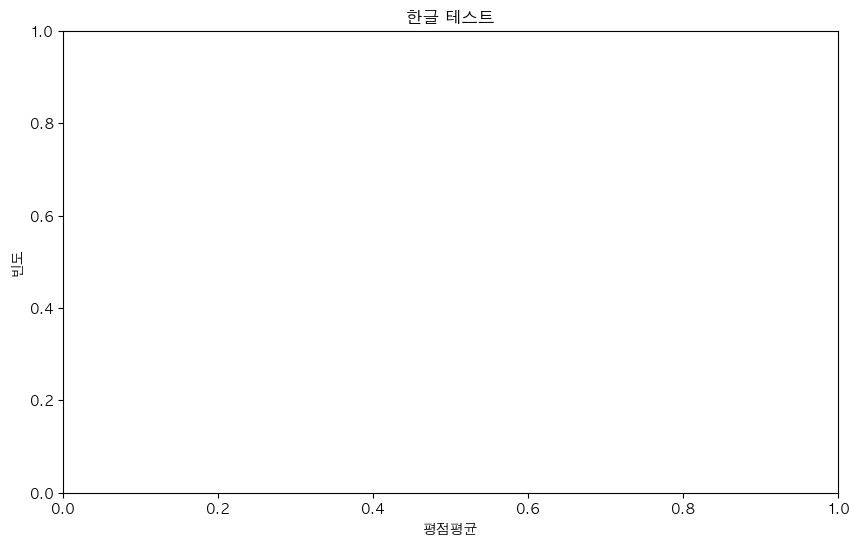

In [3]:
# %pip install matplotlib
%pip install matplotlib

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')  # Mac OS용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 다른 한글 폰트 옵션들
# plt.rc('font', family='NanumGothic')  # 또는
# plt.rc('font', family='NanumBarunGothic')  # 또는
# plt.rc('font', family='Malgun Gothic')

# 폰트 설정 확인
def check_font():
    fonts = [f.name for f in fm.fontManager.ttflist]
    print("사용 가능한 폰트:", fonts)

# 테스트 코드
def test_korean_plot():
    plt.figure(figsize=(10, 6))
    plt.title('한글 테스트')
    plt.xlabel('평점평균')
    plt.ylabel('빈도')
    plt.show()
    
# 폰트 설정 확인 및 테스트
check_font()
test_korean_plot()

Data loaded successfully
Data Shape: (1035, 14)

Data Types:
 학과명             object
성별              object
졸업년월           float64
출신고교            object
외국인학생           object
회사명             object
부서              object
근무지            float64
평점평균           float64
입학전형명           object
인턴십현장실습인정학점    float64
토익점수           float64
교환유학생여부         object
취업구분            object
dtype: object

Missing Values:
 학과명              0
성별               0
졸업년월             0
출신고교            75
외국인학생            0
회사명            680
부서             807
근무지            934
평점평균             0
입학전형명            0
인턴십현장실습인정학점    921
토익점수           607
교환유학생여부        344
취업구분             0
dtype: int64

First 5 Rows:
     학과명 성별     졸업년월             출신고교 외국인학생             회사명     부서    근무지  \
0  경제학부  남  2020.02        선린인터넷고등학교   아니오             NaN    NaN    NaN   
1  경제학부  남  2019.08         대전대신고등학교   아니오             NaN    NaN    NaN   
2  경제학부  남  2019.08           천안고등학교   아니오             NaN   

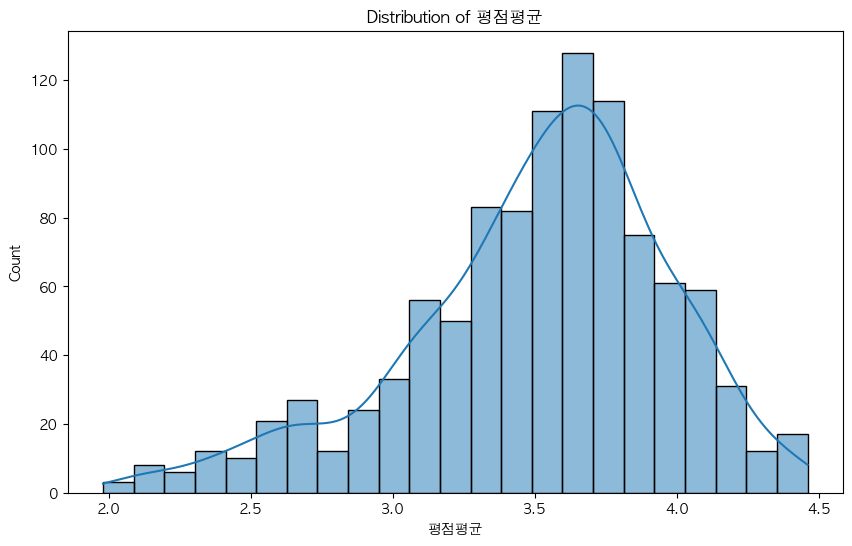

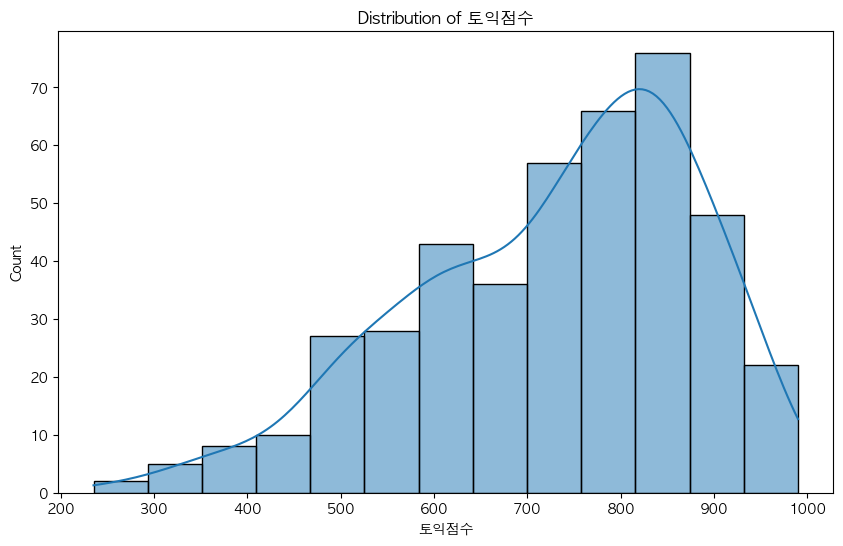

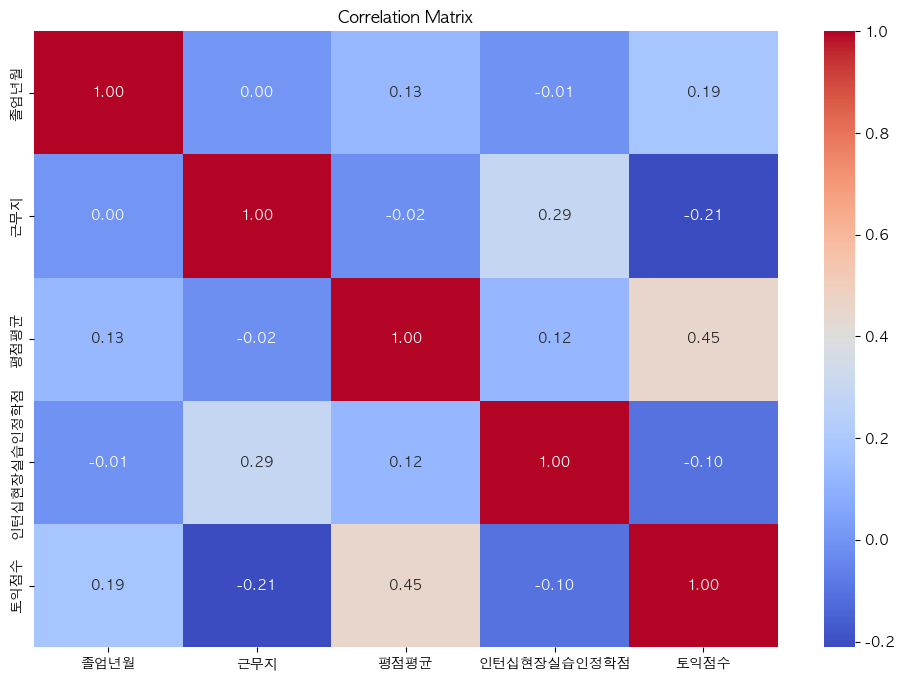

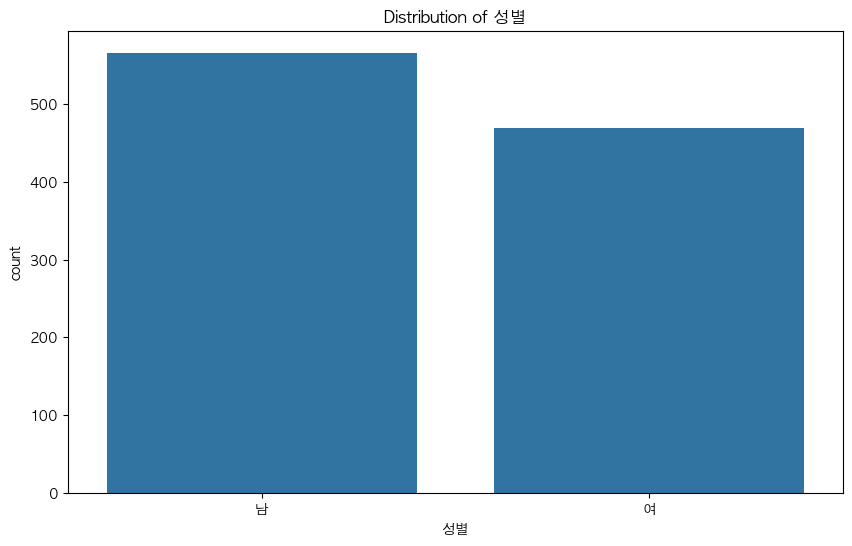

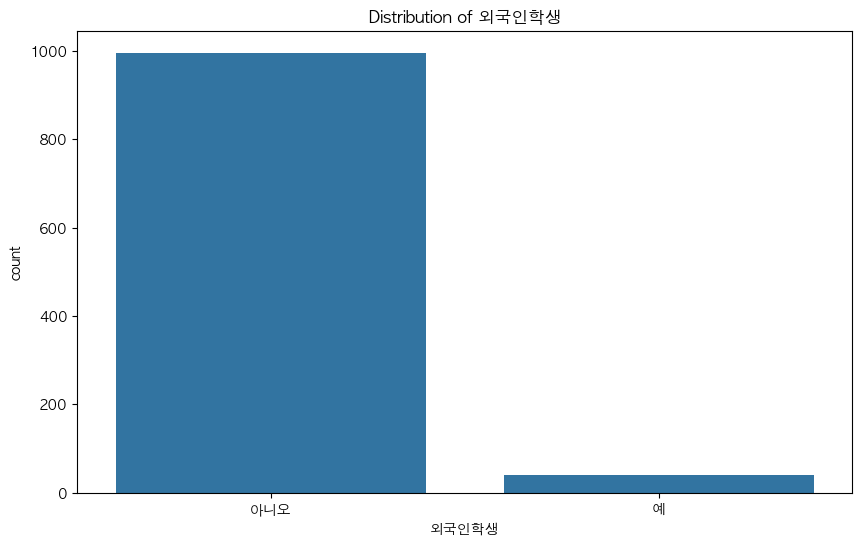

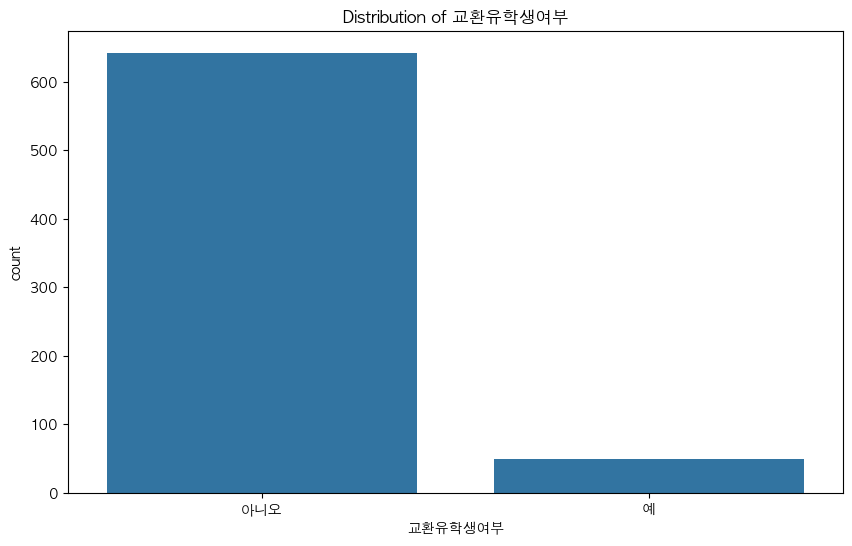

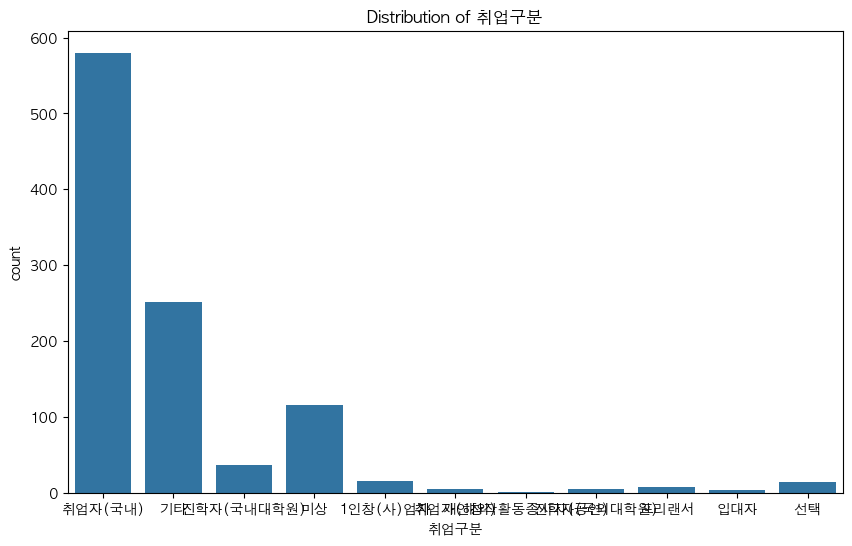

In [4]:
import sys
from pathlib import Path

# # Add project root to Python path
# project_root = str(Path.cwd().resolve().parents[0])
# if project_root not in sys.path:
#     sys.path.append(project_root)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def eda_basic_info(df: pd.DataFrame):
    print("Data Shape:", df.shape)
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nFirst 5 Rows:\n", df.head())

def eda_descriptive_statistics(df: pd.DataFrame):
    print("\nDescriptive Statistics:\n", df.describe())

def eda_missing_values(df: pd.DataFrame):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    print("\nMissing Values:\n", missing)

def eda_distribution(df: pd.DataFrame, columns: list):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

def eda_correlation(df: pd.DataFrame):
    numeric_df = df.select_dtypes(include=[float, int])  # 숫자형 데이터만 선택
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

def eda_categorical_distribution(df: pd.DataFrame, columns: list):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.show()

def perform_eda(df: pd.DataFrame):
    eda_basic_info(df)
    eda_descriptive_statistics(df)
    eda_missing_values(df)
    eda_distribution(df, ['평점평균', '토익점수'])
    eda_correlation(df)
    eda_categorical_distribution(df, ['성별', '외국인학생', '교환유학생여부', '취업구분'])

if __name__ == "__main__":
    from src.data.make_dataset import collect_data
    raw_data = collect_data()
    if raw_data is None:
        print("Error: Failed to load data")
    else:
        df = pd.DataFrame(raw_data)
        print("Data loaded successfully")
        perform_eda(df)